In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [25]:
data = pd.read_csv('data.csv')
data.drop(['Unnamed: 32'], axis=1,inplace=True)
data['diagnosis'].replace(['B','M'],[0,1],inplace=True)
data.set_index(['id'], inplace = True)

In [26]:
Aux = data['diagnosis'].value_counts()
print('Malignant :', Aux[1])
print('Benign    :', Aux[0])

Malignant : 212
Benign    : 357


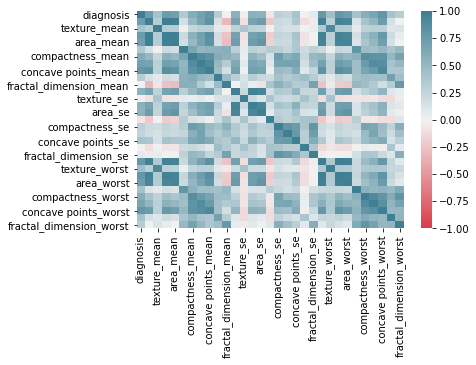

In [27]:
heat_map = sns.heatmap(data.corr(),vmax=1, vmin=-1, center=0,
            cmap=sns.diverging_palette(10, 220, as_cmap=True))
plt.show()

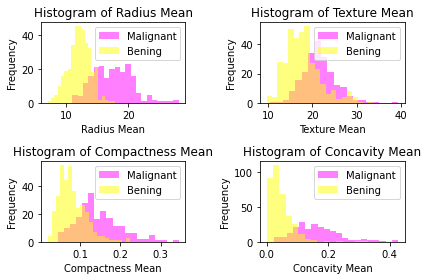

In [28]:
plt.subplot(2,2,1)
m = plt.hist(data[data["diagnosis"] == 1].radius_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == 0].radius_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean")

plt.subplot(2,2,2)
m = plt.hist(data[data["diagnosis"] == 1].texture_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == 0].texture_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Texture Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Texture Mean")

plt.subplot(2,2,3)
m = plt.hist(data[data["diagnosis"] == 1].compactness_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == 0].compactness_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Compactness Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Compactness Mean")

plt.subplot(2,2,4)
m = plt.hist(data[data["diagnosis"] == 1].concavity_mean,bins=20,fc = (1,0,1,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == 0].concavity_mean,bins=20,fc = (1,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Concavity Mean")
plt.ylabel("Frequency")
plt.title("Histogram of Concavity Mean")
plt.tight_layout()
plt.show()

In [29]:
y = data['diagnosis']
x = data.drop('diagnosis',axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y,test_size = 0.1)

modelo = RandomForestClassifier(n_estimators=200,max_depth=5)
modelo.fit(x_treino,y_treino)

RandomForestClassifier(max_depth=5, n_estimators=200)

In [30]:
previsao = modelo.predict(x_teste)
print('Acuracia : ',accuracy_score(y_teste, previsao))
print('Precisao : ',precision_score(y_teste, previsao, average='macro'))

Acuracia :  0.9122807017543859
Precisao :  0.9375


In [31]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
variable_importance = {'importance': importances,
            'index': indices}
importances_modelo = variable_importance['importance']
indices_modelo = variable_importance['index']

In [32]:
names_index = x_teste.columns

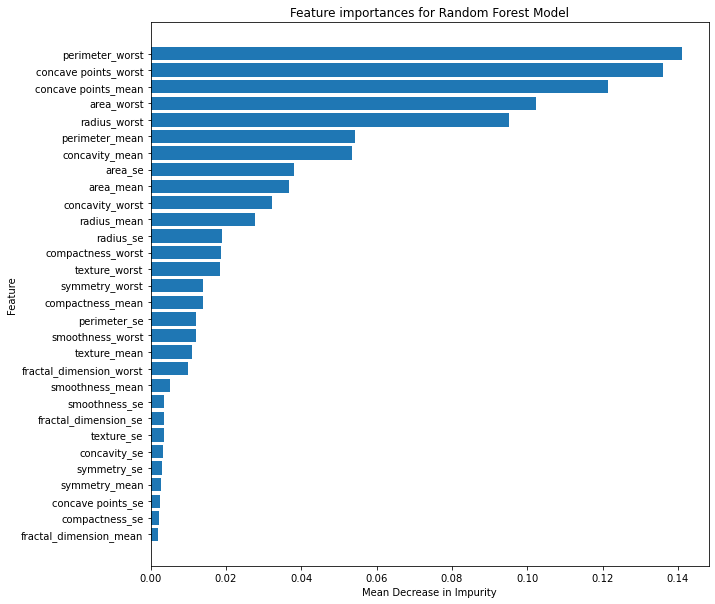

In [33]:
index = np.arange(len(names_index))
importance_desc = sorted(importances)
feature_space = []
for i in range(indices.shape[0] - 1, -1, -1):
    feature_space.append(names_index[indices[i]])
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature importances for Random Forest Model')
plt.barh(index,importance_desc,align="center")
plt.yticks(index,feature_space)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

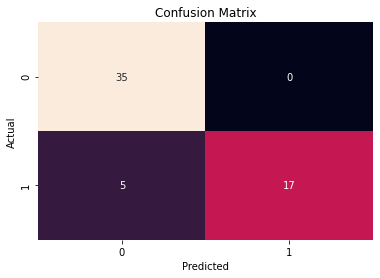

In [34]:
conf_mat = confusion_matrix(y_teste, previsao)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [35]:
modelo = ExtraTreesClassifier(n_estimators=200,max_depth=5)
modelo.fit(x_treino,y_treino)

ExtraTreesClassifier(max_depth=5, n_estimators=200)

In [36]:
previsao = modelo.predict(x_teste)
print('Acuracia : ',accuracy_score(y_teste, previsao))
print('Precisao : ',precision_score(y_teste, previsao, average='macro'))

Acuracia :  0.8421052631578947
Precisao :  0.8977272727272727


In [37]:
importances = modelo.feature_importances_
indices = np.argsort(importances)[::-1]
variable_importance = {'importance': importances,
            'index': indices}
importances_modelo = variable_importance['importance']
indices_modelo = variable_importance['index']

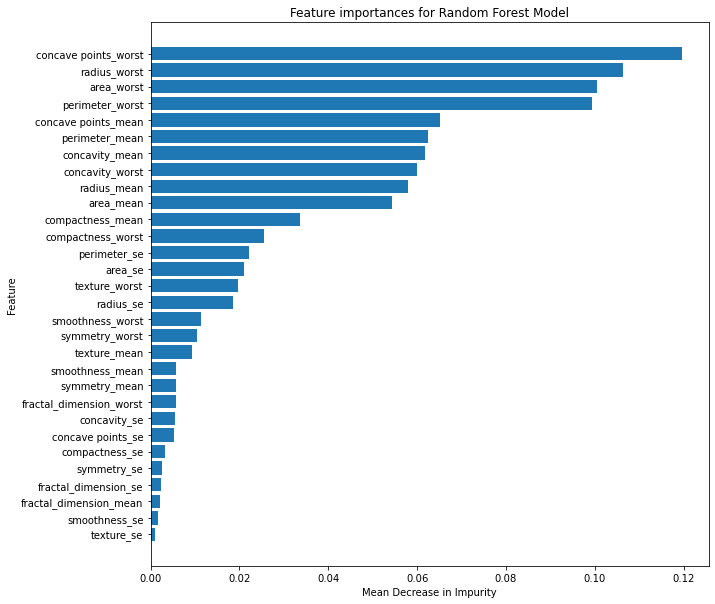

In [38]:
index = np.arange(len(names_index))
importance_desc = sorted(importances)
feature_space = []
for i in range(indices.shape[0] - 1, -1, -1):
    feature_space.append(names_index[indices[i]])
fig, ax = plt.subplots(figsize=(10, 10))
plt.title('Feature importances for Random Forest Model')
plt.barh(index,importance_desc,align="center")
plt.yticks(index,feature_space)
plt.xlabel('Mean Decrease in Impurity')
plt.ylabel('Feature')
plt.show()

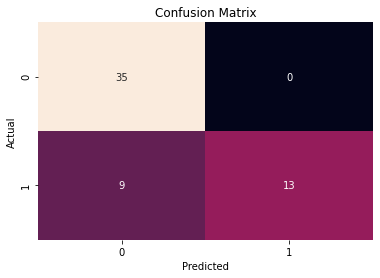

In [39]:
conf_mat = confusion_matrix(y_teste, previsao)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()